### Import Libraries

In [1]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

### Construct path after finding meeting point

In [2]:
def construct_path(meeting_point, parent_fwd, parent_bwd):
    path_forward = []
    cur = meeting_point
    while cur is not None:
        path_forward.append(cur)
        cur = parent_fwd[cur]
    path_forward.reverse()

    path_backward = []
    cur = parent_bwd[meeting_point]
    while cur is not None:
        path_backward.append(cur)
        cur = parent_bwd[cur]

    # print(f"Forward Path: {path_forward}\nBackward Path: {path_backward}")
    return path_forward + path_backward

### Visualize graph using networkX library

In [3]:
def visualize_graph_and_path(graph, path=None):
    G = nx.Graph() # empty graph
    for node, edges in graph.items(): # iterate over the nodes and edges
        for neighbor, weight in edges: # get nodes and weights
            G.add_weighted_edges_from([(node, neighbor, weight)]) # add weighted edges to graph
    pos = nx.spring_layout(G) # calculate position
    nx.draw(G, pos, with_labels=True, node_size=500, font_size=9) # draw nodes
    nx.draw_networkx_edge_labels( # edge labels 'weights' are added
        G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    )
    if path: #if a path is provided, highight it
        edges_in_path = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='r', width=2)
    plt.show()

### Bidirectional BFS Algorithm

In [4]:

def bidirectional_bfs(graph, start, goal):
    if start == goal:
        print(f"Visited order from start: [{start}]")
        print(f"Visited order from goal: [{goal}]")
        print(f"Shortest path: [{start}]")
        return

    visited_fwd = set([start])
    visited_bwd = set([goal])
    parent_fwd = {start: None}
    parent_bwd = {goal: None}

    queue_fwd = deque([start])
    queue_bwd = deque([goal])

    visited_order_fwd = []
    visited_order_bwd = []
    
    while queue_fwd and queue_bwd:
        if queue_fwd:
            node = queue_fwd.popleft()
            visited_order_fwd.append(node)
            for adjnode, _ in graph.get(node, []):
                if adjnode not in visited_fwd:
                    visited_fwd.add(adjnode)
                    parent_fwd[adjnode] = node
                    queue_fwd.append(adjnode)
                    if adjnode in visited_bwd:
                        # found in both directions
                        print(f"Visited order from start: {visited_order_fwd}")
                        print(f"Visited order from goal: {visited_order_bwd}")
                        print(f"Meeting point Node: ['{adjnode}']")
                        path = construct_path(adjnode, parent_fwd, parent_bwd)
                        print(f"Shortest path: {path}")
                        visualize_graph_and_path(graph, path)
                        return

        if queue_bwd:
            node = queue_bwd.popleft()
            visited_order_bwd.append(node)
            for adjnode, _ in graph.get(node, []):
                if adjnode not in visited_bwd:
                    visited_bwd.add(adjnode)
                    parent_bwd[adjnode] = node
                    queue_bwd.append(adjnode)
                    if adjnode in visited_fwd:
                        print(f"Visited order from start: {visited_order_fwd}")
                        print(f"Visited order from goal: {visited_order_bwd}")
                        print(f"Meeting point Node: ['{adjnode}']")
                        path = construct_path(adjnode, parent_fwd, parent_bwd)
                        print(f"Shortest path: {path}")
                        visualize_graph_and_path(graph, path)
                        return

    print(f"Visited order from start: {visited_order_fwd}")
    print(f"Visited order from goal: {visited_order_bwd}")
    print("No path found.")


Visited order from start: ['D', 'B']
Visited order from goal: ['F']
Meeting point Node: ['E']
Shortest path: ['D', 'B', 'E', 'F']


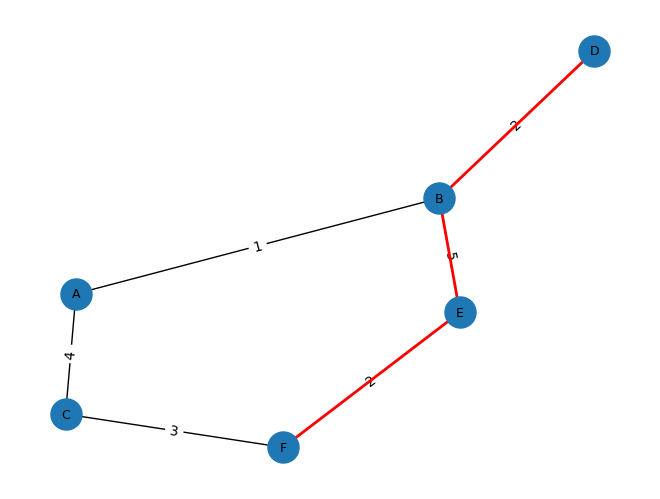

In [5]:
graph = {
    'A': [('B', 1), ('C', 2)], 
    'B': [('E', 5), ('D', 2), ('A', 1)], 
    'C': [('A', 4), ('F', 3)], 
    'D': [('B', 2)], 
    'E': [('F', 2), ('B', 5)],
    'F': [('E', 2), ('C', 3)]
}
start_node = 'D'
goal_node = 'F'
bidirectional_bfs(graph, start_node, goal_node)